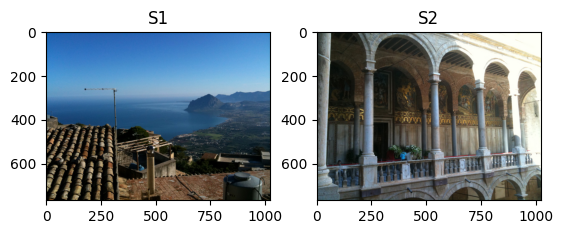

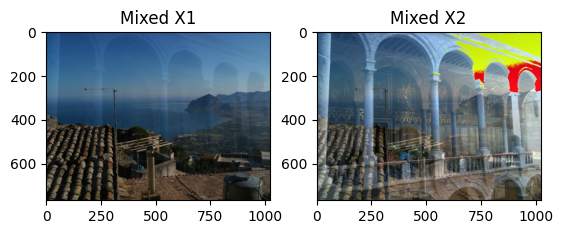

(786432, 1)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray

# Load images
S1 = np.array(Image.open('sicily1.jpg'))
S2 = np.array(Image.open('sicily2.jpg'))

# Display original images
plt.subplot(2, 2, 1)
plt.imshow(S1)
plt.title('S1')
plt.subplot(2, 2, 2)
plt.imshow(S2)
plt.title('S2')

# Mixing matrix
A = np.array([[0.7, 0.1], [1/2, 2/3]])

# Mix images
X1 = A[0, 0] * S1 + A[0, 1] * S2
X2 = A[1, 0] * S1 + A[1, 1] * S2

# Display mixed images
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow(X1.astype('uint8'))
plt.title('Mixed X1')
plt.subplot(2, 2, 2)
plt.imshow(X2.astype('uint8'))
plt.title('Mixed X2')

# Compute means
X1bw = rgb2gray(X1);
X2bw = rgb2gray(X2);

m, n = X1bw.shape
x1 = X1bw.reshape(m * n, 1)
x2 = X2bw.reshape(m * n, 1)
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)

plt.show()


In [24]:
from sklearn.decomposition import PCA, FastICA

X = np.hstack((x1,x2))
print(X.shape)

# Compute ICA
ica = FastICA(n_components=2, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

print(S_.shape)
print(A_)


(786432, 2)
(786432, 2)
[[  1852.32128932 -33132.69828995]
 [ 37279.53632895 -30923.52830676]]


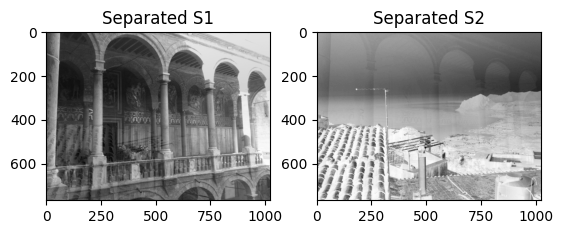

In [32]:
# Normalize and display separated sources
S1bar = S_[:,0].reshape(m , n)
S2bar = S_[:,1].reshape(m , n)

min1 = np.min(S1bar)
S1bar = S1bar - min1
max1 = np.max(S1bar)
S1bar = S1bar * (255 / max1)

min2 = np.min(S2bar)
S2bar = S2bar - min2
max2 = np.max(S2bar)
S2bar = S2bar * (255 / max2)

plt.subplot(2, 2, 3)
plt.imshow(S1bar.astype('uint8'), cmap='gray')
plt.title('Separated S1')
plt.subplot(2, 2, 4)
plt.imshow(S2bar.astype('uint8'), cmap='gray')
plt.title('Separated S2')

plt.savefig('FastICA.eps', format='eps', bbox_inches='tight')
plt.show()
